**Senchola Batch 2 Selected Details**

Import Data from excel file

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/Batch-2 Senchola form application -Data Cleaned.xlsx')

In [ ]:
df.head()

,Name,Gender,Qualification,Pass-out Year,City,KYC,Domain,College Name
0,PRAGATHEESHWARAN K,Female,Engineering,2021,Chennai,Done,Software Testing,Aarupadi Veedu Institute Of Technology
1,S.KARTHICK,Male,Engineering,2022,Uthukottai,Done,Software Testing,Adhiparasakthi Engineering College
2,R VIGNESH,Male,Arts & Science,2023,Karaikudi,Done,Backend,Alagappa Govt Arts College Karaikudi
3,S PAVITHRA,Female,Arts & Science,2023,Madurai,pending,UI/UX,American College
4,KARUPPASAMY A,Male,Arts & Science,2023,Madurai,Done,Frontend,American College


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           125 non-null    object
 1   Gender         125 non-null    object
 2   Qualification  125 non-null    object
 3   Pass-out Year  125 non-null    object
 4   City           125 non-null    object
 5   KYC            125 non-null    object
 6   Domain         125 non-null    object
 7   College Name   125 non-null    object
dtypes: object(8)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

Name             0
Gender           0
Qualification    0
Pass-out Year    0
City             0
KYC              0
Domain           0
College Name     0
dtype: int64

In [ ]:
df.columns

Index(['Name', 'Gender', 'Qualification', 'Pass-out Year', 'City', 'KYC',
       'Domain', 'College Name'],
      dtype='object')

## **Insights**

1)Total Interns

In [ ]:
total_interns=df['Name'].count()
print("Total number of Interns:" ,total_interns)

Total number of Interns: 125


2)Total College

In [ ]:
Total_colleges = df['College Name'].nunique()
print("Total number of college:",Total_colleges)

Total number of college: 100


3)**Total cities**

In [ ]:
total_city=df['City'].nunique()
print("Total number of cities:" ,total_city)

Total number of cities: 46


**4) Interns by Gender**

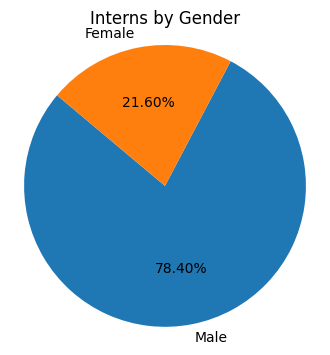

In [ ]:
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Interns by Gender')
plt.axis('equal')
plt.show()

**5)Interns by Qualification**

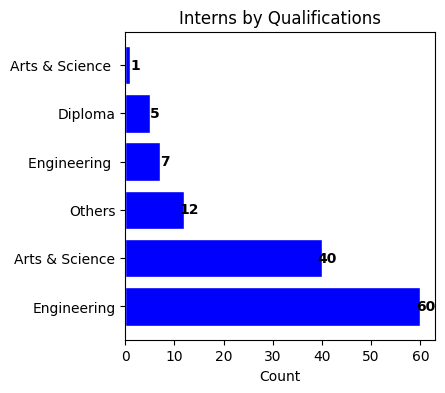

In [ ]:
Intern_Qualification = df['Qualification'].value_counts()

levels = np.arange(len(Intern_Qualification))


fig, ax = plt.subplots(figsize=(4, 4))
for i in levels:
    plt.barh(levels[i], Intern_Qualification[i], color='blue', edgecolor='white')
    plt.text(Intern_Qualification[i] + 1, levels[i], str(Intern_Qualification[i]), ha='center', va='center', fontsize=10, fontweight='bold', color='black')

plt.yticks(levels, Intern_Qualification.index)
plt.xlabel('Count')
plt.title('Interns by Qualifications')
plt.show()

**6)Interns by Domain**

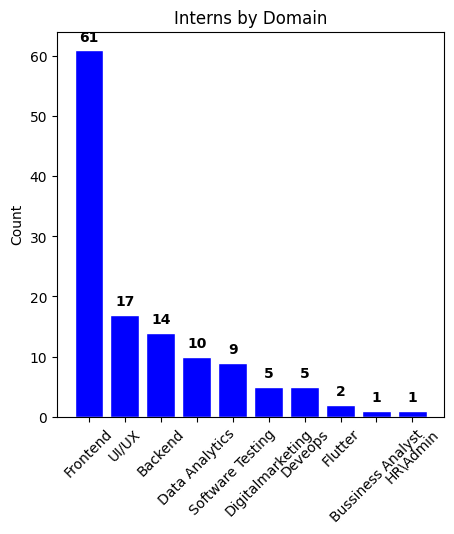

In [ ]:
Intern_Domain = df['Domain'].value_counts()
levels = np.arange(len(Intern_Domain))

fig, ax = plt.subplots(figsize=(5, 5))

for i in levels:
    plt.bar(levels[i], Intern_Domain[i], color='blue', edgecolor='white')
    plt.text(levels[i], Intern_Domain[i] + 1, str(Intern_Domain[i]), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(levels, Intern_Domain.index, rotation=45)
plt.ylabel('Count')
plt.title('Interns by Domain')
plt.show()

**7)Interns by Pass-Out Year**

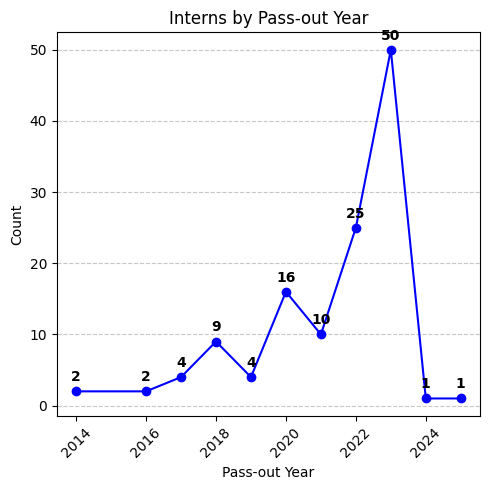

In [ ]:
df['Pass-out Year'] = pd.to_numeric(df['Pass-out Year'], errors='coerce')
Intern_year = df['Pass-out Year'].value_counts().sort_index()

years = Intern_year.index
counts = Intern_year.values

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(years, counts, marker='o', color='blue', linestyle='-')

for i, count in enumerate(counts):
    plt.text(years[i], count + 1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel('Pass-out Year')
plt.ylabel('Count')
plt.title('Interns by Pass-out Year')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**8)Interns by City**

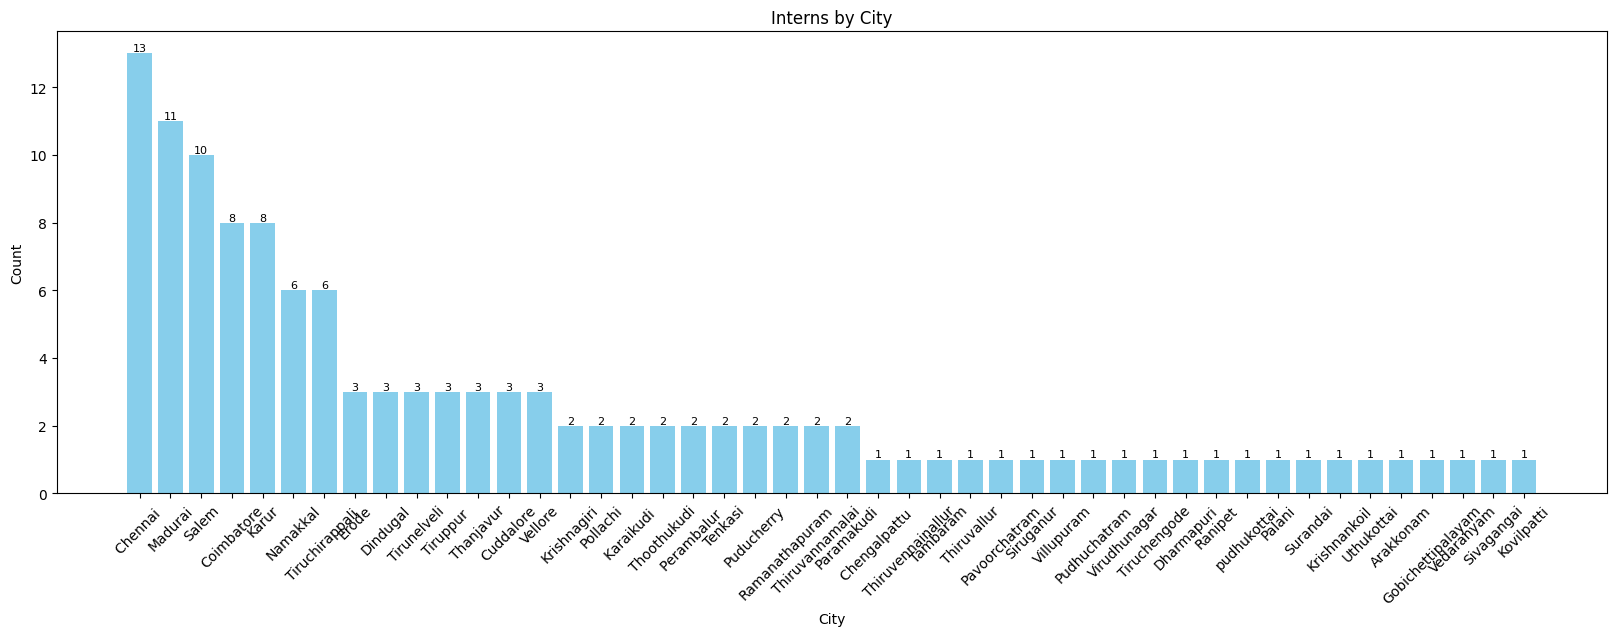

In [ ]:

Interns_by_City = df['City'].value_counts()

plt.figure(figsize=(20, 6))
bars = plt.bar(Interns_by_City.index, Interns_by_City.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Interns by City')
plt.xticks(rotation=45)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.show()

**9)Interns by College**

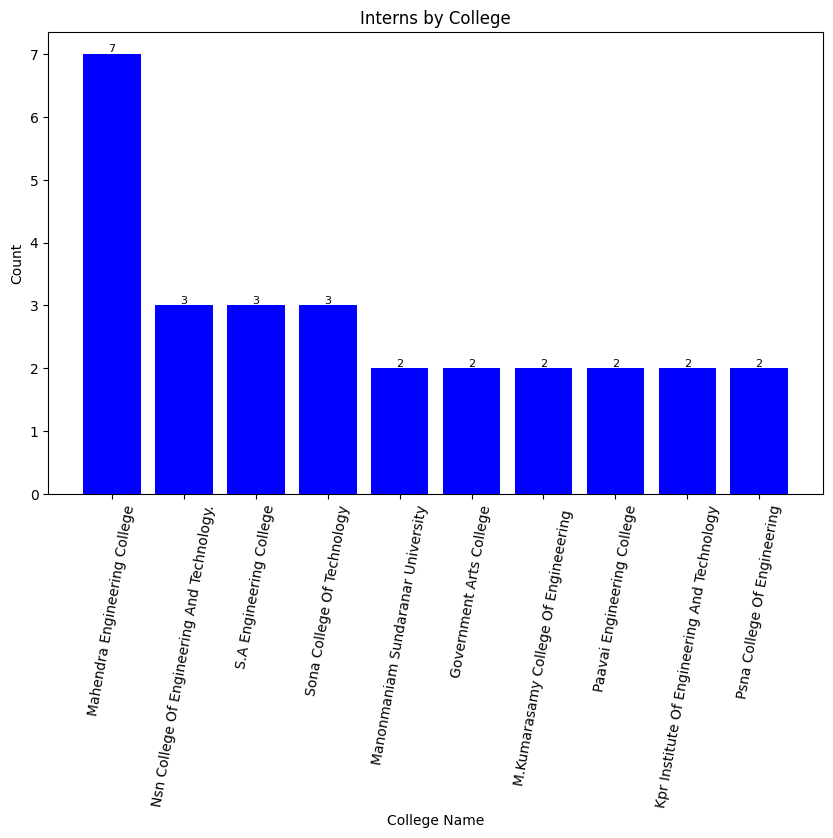

In [ ]:
Interns_by_College= df['College Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(Interns_by_College.index, Interns_by_College.values, color='blue')
plt.xlabel('College Name')
plt.ylabel('Count')
plt.title('Interns by College')
plt.xticks(rotation=80)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.show()

10) Interns by KYC status

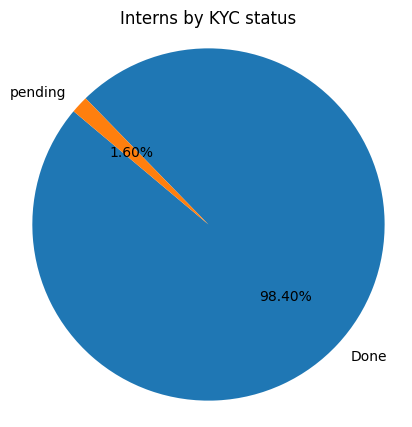

In [ ]:
KYC_counts = df['KYC'].value_counts()

if 'Done' in KYC_counts:
    KYC_counts['Done'] += KYC_counts.get('Done ', 0)
    KYC_counts = KYC_counts.drop('Done ', errors='ignore')

plt.figure(figsize=(5, 5))
plt.pie(KYC_counts, labels=KYC_counts.index, autopct='%1.2f%%', startangle=140)


plt.title('Interns by KYC status')
plt.axis('equal')
plt.show()

                                                                     **THANK YOU**